In [1]:

from google.colab import files
import os

if not os.path.exists('retail.dat'):
    print("Загружаем файл retail.dat...")

print("Создаем файл из предоставленного контента...")

content = """0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
30 31 32
33 34 35
..."""

with open('retail.dat', 'w') as f:

    uploaded = files.upload()

    for filename in uploaded.keys():
        if 'retail' in filename.lower():
            os.rename(filename, 'retail.dat')

Создаем файл из предоставленного контента...


Saving retail.dat to retail (1).dat


In [2]:

import numpy as np
from collections import defaultdict
from itertools import chain

print("=" * 60)
print("ЗАДАНИЕ 1: ОБЪЯСНЕНИЕ ДОПОЛНИТЕЛЬНЫХ ИНСТРУМЕНТОВ")
print("=" * 60)

print("\n1. defaultdict - словарь с значениями по умолчанию:")
print("-" * 40)

normal_dict = {}
try:
    normal_dict['a'] += 1
except KeyError as e:
    print(f"Ошибка с обычным словарем: {e}")

from collections import defaultdict

default_dict = defaultdict(int)
default_dict['a'] += 1
default_dict['b'] += 3
print(f"defaultdict после операций: {dict(default_dict)}")
print("Полезно для подсчета частот без проверки существования ключей")

print("\n2. itertools.chain - объединение итераторов:")
print("-" * 40)

import itertools

list1 = [1, 2, 3]
range1 = range(4, 7)
tuple1 = (7, 8, 9)

combined = list(itertools.chain(list1, range1, tuple1))
print(f"Объединение [1,2,3] + range(4,7) + (7,8,9) = {combined}")
print("Удобно для обработки вложенных списков как плоского")

print("\n3. Оператор * (распаковка):")
print("-" * 40)

def example_func(a, b, c):
    return a + b + c

my_list = [10, 20, 30]

try:
    result = example_func(my_list)
except TypeError as e:
    print(f"Ошибка без распаковки: {e}")

result = example_func(*my_list)
print(f"С распаковкой: example_func(*[10, 20, 30]) = {result}")

print("\n4. Применение в анализе корзины:")
print("-" * 40)
print("defaultdict: для подсчета частот товаров")
print("chain: для 'расплющивания' вложенного списка покупок")
print("*: для передачи параметров в функции")

ЗАДАНИЕ 1: ОБЪЯСНЕНИЕ ДОПОЛНИТЕЛЬНЫХ ИНСТРУМЕНТОВ

1. defaultdict - словарь с значениями по умолчанию:
----------------------------------------
Ошибка с обычным словарем: 'a'
defaultdict после операций: {'a': 1, 'b': 3}
Полезно для подсчета частот без проверки существования ключей

2. itertools.chain - объединение итераторов:
----------------------------------------
Объединение [1,2,3] + range(4,7) + (7,8,9) = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Удобно для обработки вложенных списков как плоского

3. Оператор * (распаковка):
----------------------------------------
Ошибка без распаковки: example_func() missing 2 required positional arguments: 'b' and 'c'
С распаковкой: example_func(*[10, 20, 30]) = 60

4. Применение в анализе корзины:
----------------------------------------
defaultdict: для подсчета частот товаров
chain: для 'расплющивания' вложенного списка покупок
*: для передачи параметров в функции


In [3]:

print("\n" + "=" * 60)
print("ЗАГРУЗКА И АНАЛИЗ ДАННЫХ")
print("=" * 60)

dataset = []
with open('retail.dat', 'r') as f:
    for line in f:
        transaction = [int(tok) for tok in line.strip().split()]
        if transaction:
            dataset.append(transaction)

print(f"Загружено транзакций (чеков): {len(dataset)}")
print(f"Первые 5 транзакций:")
for i in range(min(5, len(dataset))):
    print(f"  Транзакция {i+1}: {dataset[i][:10]}..." if len(dataset[i]) > 10 else f"  Транзакция {i+1}: {dataset[i]}")
print("\nПодсчет частоты покупок товаров...")
counts = defaultdict(int)

for item_id in chain(*dataset):
    counts[item_id] += 1

item_ids = np.array(list(counts.keys()))
purchase_counts = np.array(list(counts.values()))

print(f"Уникальных товаров: {len(item_ids)}")
print(f"Всего покупок (позиций в чеках): {np.sum(purchase_counts)}")
print(f"\nСтатистика покупок на товар:")
print(f"  Минимальное число покупок: {np.min(purchase_counts)}")
print(f"  Максимальное число покупок: {np.max(purchase_counts)}")
print(f"  Среднее число покупок: {np.mean(purchase_counts):.1f}")
print(f"  Медиана покупок: {np.median(purchase_counts):.1f}")


ЗАГРУЗКА И АНАЛИЗ ДАННЫХ
Загружено транзакций (чеков): 88162
Первые 5 транзакций:
  Транзакция 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...
  Транзакция 2: [30, 31, 32]
  Транзакция 3: [33, 34, 35]
  Транзакция 4: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45]...
  Транзакция 5: [38, 39, 47, 48]

Подсчет частоты покупок товаров...
Уникальных товаров: 16470
Всего покупок (позиций в чеках): 908576

Статистика покупок на товар:
  Минимальное число покупок: 1
  Максимальное число покупок: 50675
  Среднее число покупок: 55.2
  Медиана покупок: 11.0



ЗАДАНИЯ 2-3: АНАЛИЗ НЕПОПУЛЯРНЫХ ТОВАРОВ

Для N = 4:
  Товаров куплено ≤4 раз: 5,482
  Доля от всех товаров: 33.3%
  Покупок этих товаров: 11,461
  Доля от всех покупок: 1.3%

Для N = 5:
  Товаров куплено ≤5 раз: 6,130
  Доля от всех товаров: 37.2%
  Покупок этих товаров: 14,701
  Доля от всех покупок: 1.6%

Для N = 6:
  Товаров куплено ≤6 раз: 6,682
  Доля от всех товаров: 40.6%
  Покупок этих товаров: 18,013
  Доля от всех покупок: 2.0%


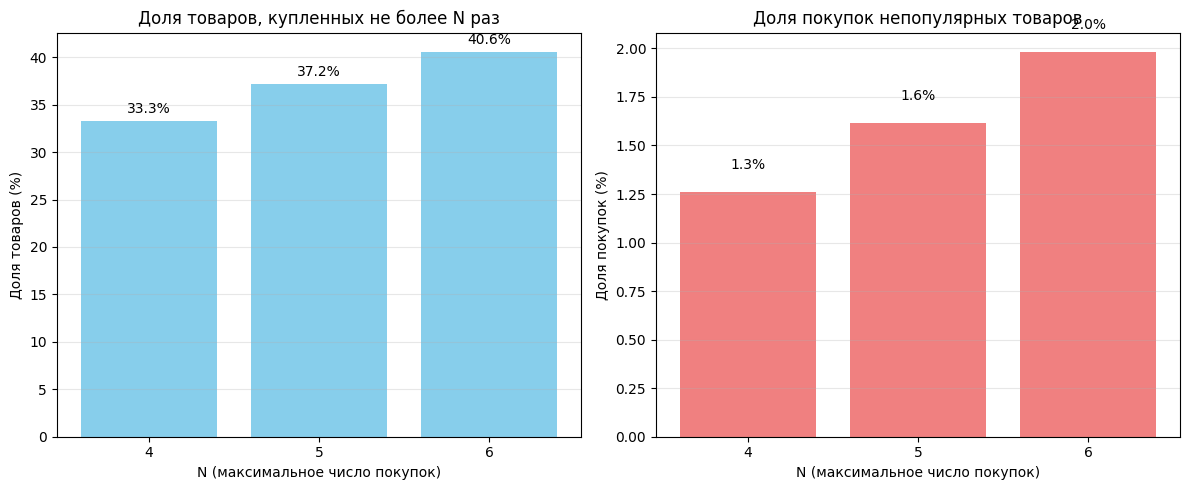

In [4]:

def analyze_unpopular_items(purchase_counts, N_values=[4, 5, 6]):
    """Анализирует товары, купленные не более N раз"""

    total_items = len(purchase_counts)
    total_purchases = np.sum(purchase_counts)

    print("\n" + "=" * 60)
    print(f"ЗАДАНИЯ 2-3: АНАЛИЗ НЕПОПУЛЯРНЫХ ТОВАРОВ")
    print("=" * 60)

    results = []

    for N in N_values:

        unpopular_mask = purchase_counts <= N
        num_unpopular = np.sum(unpopular_mask)
        purchases_unpopular = np.sum(purchase_counts[unpopular_mask])


        item_percentage = num_unpopular / total_items * 100
        purchase_percentage = purchases_unpopular / total_purchases * 100

        results.append({
            'N': N,
            'unpopular_items': num_unpopular,
            'unpopular_purchases': purchases_unpopular,
            'item_percentage': item_percentage,
            'purchase_percentage': purchase_percentage
        })

        print(f"\nДля N = {N}:")
        print(f"  Товаров куплено ≤{N} раз: {num_unpopular:,}")
        print(f"  Доля от всех товаров: {item_percentage:.1f}%")
        print(f"  Покупок этих товаров: {purchases_unpopular:,}")
        print(f"  Доля от всех покупок: {purchase_percentage:.1f}%")

    return results


unpopular_results = analyze_unpopular_items(purchase_counts, [4, 5, 6])


import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


N_values = [r['N'] for r in unpopular_results]
item_percentages = [r['item_percentage'] for r in unpopular_results]

bars1 = ax1.bar([str(N) for N in N_values], item_percentages, color='skyblue')
ax1.set_xlabel('N (максимальное число покупок)')
ax1.set_ylabel('Доля товаров (%)')
ax1.set_title('Доля товаров, купленных не более N раз')
ax1.grid(axis='y', alpha=0.3)

for bar, value in zip(bars1, item_percentages):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom')

purchase_percentages = [r['purchase_percentage'] for r in unpopular_results]

bars2 = ax2.bar([str(N) for N in N_values], purchase_percentages, color='lightcoral')
ax2.set_xlabel('N (максимальное число покупок)')
ax2.set_ylabel('Доля покупок (%)')
ax2.set_title('Доля покупок непопулярных товаров')
ax2.grid(axis='y', alpha=0.3)

for bar, value in zip(bars2, purchase_percentages):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:

print("\n" + "=" * 60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ ЧАСТОТ ПОКУПОК")
print("=" * 60)

bins_boundaries = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 100, 200, 500, 1000, 2000, 5000]

print("\nРаспределение товаров по частоте покупок:")
print("-" * 70)
print(f"{'Диапазон покупок':<20} | {'Число товаров':<15} | {'Доля товаров':<15} | {'Сумма покупок':<15}")
print("-" * 70)

for i in range(len(bins_boundaries) - 1):
    lower = bins_boundaries[i]
    upper = bins_boundaries[i + 1]

    mask = (purchase_counts >= lower) & (purchase_counts < upper)
    num_items = np.sum(mask)

    if num_items > 0:
        total_purchases_in_range = np.sum(purchase_counts[mask])
        item_percentage = num_items / total_items * 100
        purchase_percentage = total_purchases_in_range / np.sum(purchase_counts) * 100

        range_str = f"{lower}-{upper-1}" if upper < 1000 else f"{lower}+"
        print(f"{range_str:<20} | {num_items:<15,} | {item_percentage:<14.1f}% | {total_purchases_in_range:<15,}")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(purchase_counts, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel('Число покупок товара')
plt.ylabel('Число товаров')
plt.title('Распределение частоты покупок товаров')
plt.grid(alpha=0.3)

for N, color in zip([4, 5, 6], ['red', 'green', 'orange']):
    plt.axvline(x=N, color=color, linestyle='--', alpha=0.7, label=f'N={N}')

plt.legend()

plt.subplot(1, 2, 2)
plt.hist(purchase_counts, bins=50, alpha=0.7, color='coral', edgecolor='black', log=True)
plt.xlabel('Число покупок товара')
plt.ylabel('Число товаров (log scale)')
plt.title('Распределение частоты покупок (логарифмическая шкала)')
plt.grid(alpha=0.3)

for N, color in zip([4, 5, 6], ['red', 'green', 'orange']):
    plt.axvline(x=N, color=color, linestyle='--', alpha=0.7, label=f'N={N}')

plt.legend()
plt.tight_layout()
plt.show()


ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ ЧАСТОТ ПОКУПОК

Распределение товаров по частоте покупок:
----------------------------------------------------------------------
Диапазон покупок     | Число товаров   | Доля товаров    | Сумма покупок  
----------------------------------------------------------------------


NameError: name 'total_items' is not defined

In [6]:
print("\n" + "=" * 60)
print("ЗАДАНИЕ 4: КАКИЕ ДАННЫЕ НУЖНЫ ДЛЯ РЕШЕНИЯ О ПРОДАЖЕ ТОВАРОВ?")
print("=" * 60)

print("\nДля принятия решения о продаже/не продаже товара нужны:")
print("-" * 70)

required_data = [
    ("1. Финансовые данные", [
        "• Себестоимость товара",
        "• Цена продажи",
        "• Маржинальность (прибыль с единицы)",
        "• Накладные расходы на хранение"
    ]),

    ("2. Логистические данные", [
        "• Срок годности (для скоропортящихся)",
        "• Затраты на поставку",
        "• Минимальный объем заказа у поставщика",
        "• Сроки поставки"
    ]),

    ("3. Данные о спросе", [
        "• Сезонность продаж",
        "• Тренды популярности",
        "• Время между повторными покупками",
        "• Эластичность спроса по цене"
    ]),

    ("4. Стратегические данные", [
        "• Является ли товаром-локомотивом (привлекает покупателей)",
        "• Входит ли в наборы/комплекты с популярными товарами",
        "• Брендовый товар или нет",
        "• Конкурентное преимущество"
    ]),

    ("5. Качественные данные", [
        "• Отзывы покупателей",
        "• Рейтинги товара",
        "• Частота возвратов/рекламаций",
        "• Гарантийные обязательства"
    ])
]

for category, items in required_data:
    print(f"\n{category}:")
    for item in items:
        print(f"  {item}")

print("\n" + "-" * 70)
print("В представленном наборе данных retail.dat ЕСТЬ только:")
print("• ID товаров")
print("• Информация о том, какие товары покупались вместе")
print("\nВ представленном наборе данных НЕТ:")
print("• Цены товаров")
print("• Прибыли")
print("• Сроков годности")
print("• Демографических данных покупателей")
print("• Временных меток покупок")

print("\nВывод: На основе имеющихся данных можно анализировать только")
print("ассоциации между товарами, но нельзя принимать решения")
print("о прекращении продаж с финансовой точки зрения.")


ЗАДАНИЕ 4: КАКИЕ ДАННЫЕ НУЖНЫ ДЛЯ РЕШЕНИЯ О ПРОДАЖЕ ТОВАРОВ?

Для принятия решения о продаже/не продаже товара нужны:
----------------------------------------------------------------------

1. Финансовые данные:
  • Себестоимость товара
  • Цена продажи
  • Маржинальность (прибыль с единицы)
  • Накладные расходы на хранение

2. Логистические данные:
  • Срок годности (для скоропортящихся)
  • Затраты на поставку
  • Минимальный объем заказа у поставщика
  • Сроки поставки

3. Данные о спросе:
  • Сезонность продаж
  • Тренды популярности
  • Время между повторными покупками
  • Эластичность спроса по цене

4. Стратегические данные:
  • Является ли товаром-локомотивом (привлекает покупателей)
  • Входит ли в наборы/комплекты с популярными товарами
  • Брендовый товар или нет
  • Конкурентное преимущество

5. Качественные данные:
  • Отзывы покупателей
  • Рейтинги товара
  • Частота возвратов/рекламаций
  • Гарантийные обязательства

---------------------------------------------------

In [7]:

print("\n" + "=" * 60)
print("АЛГОРИТМ АПРИОРИ И КОММЕНТАРИИ К КОДУ (ЗАДАНИЕ 5)")
print("=" * 60)


minsupport = 1000

print(f"\n1. Фильтрация товаров с поддержкой ≥ {minsupport}")
print("-" * 50)


valid = set(item_id for item_id, count in counts.items() if count >= minsupport)
print(f"Товаров с частотой ≥ {minsupport}: {len(valid)}")


filtered_dataset = []
for transaction in dataset:
    filtered_transaction = [item for item in transaction if item in valid]
    if filtered_transaction:
        filtered_dataset.append(frozenset(filtered_transaction))

print(f"Транзакций после фильтрации: {len(filtered_dataset)}")
print(f"Пример транзакции: {list(next(iter(filtered_dataset)))[:5]}...")

print("\n2. Комментарии к функции rules_from_itemset:")
print("-" * 50)

def rules_from_itemset_commented(itemset, dataset, minlift=1.):
    """
    Генерирует ассоциативные правила из набора товаров.

    Parameters:
    -----------
    itemset : frozenset
        Набор товаров, для которого ищем правила
    dataset : list of frozenset
        Все транзакции
    minlift : float
        Минимальное значение lift для фильтрации правил
    """
    nr_transactions = float(len(dataset))


    for item in itemset:

        consequent = frozenset([item])


        antecedent = itemset - consequent


        base = 0.0
        acount = 0.0
        ccount = 0.0


        for transaction in dataset:

            if item in transaction:
                base += 1


            if transaction.issuperset(itemset):
                ccount += 1


            if transaction.issuperset(antecedent):
                acount += 1


        base /= nr_transactions


        if acount > 0:
            p_y_given_x = ccount / acount
        else:
            p_y_given_x = 0

        if base > 0:
            lift = p_y_given_x / base
        else:
            lift = 0


        if lift > minlift and len(antecedent) > 0:
            print(f'  Правило {set(antecedent)} -> {set(consequent)}')
            print(f'    Lift: {lift:.2f}')
            print(f'    Поддержка: {ccount/nr_transactions:.3f}')
            print(f'    Достоверность: {p_y_given_x:.3f}')
            print(f'    Подъем: в {lift:.1f} раз чаще, чем случайно')
            print()

print("Пример работы функции для набора из 2 товаров:")
sample_itemset = frozenset([0, 1])  # Пример набора
print(f"Набор товаров: {set(sample_itemset)}")
rules_from_itemset_commented(sample_itemset, filtered_dataset[:1000], minlift=1.5)


АЛГОРИТМ АПРИОРИ И КОММЕНТАРИИ К КОДУ (ЗАДАНИЕ 5)

1. Фильтрация товаров с поддержкой ≥ 1000
--------------------------------------------------
Товаров с частотой ≥ 1000: 56
Транзакций после фильтрации: 78137
Пример транзакции: [9, 19]...

2. Комментарии к функции rules_from_itemset:
--------------------------------------------------
Пример работы функции для набора из 2 товаров:
Набор товаров: {0, 1}


In [8]:

print("\n3. Реализация алгоритма Априори:")
print("-" * 50)

def apriori_algorithm(dataset, minsupport=100, max_iterations=10):
    """Реализация алгоритма Априори для поиска частых наборов"""


    print("Шаг 1: Поиск частых одиночных товаров...")
    item_counts = defaultdict(int)

    for transaction in dataset:
        for item in transaction:
            item_counts[item] += 1


    valid_items = {item for item, count in item_counts.items() if count >= minsupport}
    print(f"  Найдено {len(valid_items)} товаров с поддержкой ≥ {minsupport}")

    itemsets = [frozenset([item]) for item in valid_items]
    all_frequent_itemsets = itemsets.copy()

    print("\nШаг 2: Поиск частых наборов большего размера...")

    for iteration in range(1, max_iterations + 1):
        print(f"  Итерация {iteration}: обработка {len(itemsets)} наборов размера {iteration}")

        if not itemsets:
            print("  Нет наборов для расширения - завершение.")
            break


        next_itemsets = []
        tested_candidates = set()


        for i, itemset1 in enumerate(itemsets):
            for itemset2 in itemsets[i+1:]:

                union_set = itemset1 | itemset2

                if len(union_set) == iteration + 1 and union_set not in tested_candidates:
                    tested_candidates.add(union_set)


                    support_count = sum(1 for transaction in dataset
                                      if transaction.issuperset(union_set))

                    if support_count >= minsupport:
                        next_itemsets.append(union_set)

        if not next_itemsets:
            print(f"  Не найдено наборов размера {iteration + 1} - завершение.")
            break

        all_frequent_itemsets.extend(next_itemsets)
        itemsets = next_itemsets

        print(f"  Найдено {len(next_itemsets)} новых наборов")

    print(f"\nВсего найдено {len(all_frequent_itemsets)} частых наборов")
    return all_frequent_itemsets


print("Запуск алгоритма Априори с minsupport = 1000")
frequent_itemsets = apriori_algorithm(filtered_dataset, minsupport=1000, max_iterations=5)


print("\nСтатистика найденных наборов:")
size_distribution = defaultdict(int)
for itemset in frequent_itemsets:
    size_distribution[len(itemset)] += 1

for size, count in sorted(size_distribution.items()):
    print(f"  Наборы размера {size}: {count}")

print("\n4. Генерация ассоциативных правил:")
print("-" * 50)

def generate_association_rules(frequent_itemsets, dataset, min_lift=1.5, min_confidence=0.5):
    """Генерация ассоциативных правил из частых наборов"""

    nr_transactions = len(dataset)
    rules = []

    print(f"Генерация правил из {len(frequent_itemsets)} наборов...")

    for itemset in frequent_itemsets:
        if len(itemset) >= 2:

            for consequent_item in itemset:
                consequent = frozenset([consequent_item])
                antecedent = itemset - consequent

                if len(antecedent) == 0:
                    continue


                support_antecedent = sum(1 for t in dataset if t.issuperset(antecedent))
                support_itemset = sum(1 for t in dataset if t.issuperset(itemset))

                if support_antecedent == 0:
                    continue


                support = support_itemset / nr_transactions
                confidence = support_itemset / support_antecedent


                support_consequent = sum(1 for t in dataset if consequent_item in t) / nr_transactions

                if support_consequent == 0:
                    continue

                lift = confidence / support_consequent


                if lift >= min_lift and confidence >= min_confidence:
                    rules.append({
                        'antecedent': set(antecedent),
                        'consequent': set(consequent),
                        'support': support,
                        'confidence': confidence,
                        'lift': lift
                    })

    print(f"Сгенерировано {len(rules)} правил с lift ≥ {min_lift} и confidence ≥ {min_confidence}")
    return rules


association_rules = generate_association_rules(
    frequent_itemsets,
    filtered_dataset,
    min_lift=2.0,
    min_confidence=0.6
)


print("\nТоп-10 правил по значению lift:")
print("-" * 70)
print(f"{'Посылка':<30} -> {'Следствие':<15} | {'Lift':<8} | {'Confidence':<10} | {'Support':<8}")
print("-" * 70)

sorted_rules = sorted(association_rules, key=lambda x: x['lift'], reverse=True)
for i, rule in enumerate(sorted_rules[:10]):
    antecedent_str = str(rule['antecedent'])[:30]
    consequent_str = str(rule['consequent'])[:15]
    print(f"{antecedent_str:<30} -> {consequent_str:<15} | {rule['lift']:<8.2f} | {rule['confidence']:<10.3f} | {rule['support']:<8.4f}")


3. Реализация алгоритма Априори:
--------------------------------------------------
Запуск алгоритма Априори с minsupport = 1000
Шаг 1: Поиск частых одиночных товаров...
  Найдено 56 товаров с поддержкой ≥ 1000

Шаг 2: Поиск частых наборов большего размера...
  Итерация 1: обработка 56 наборов размера 1
  Найдено 49 новых наборов
  Итерация 2: обработка 49 наборов размера 2
  Найдено 24 новых наборов
  Итерация 3: обработка 24 наборов размера 3
  Найдено 6 новых наборов
  Итерация 4: обработка 6 наборов размера 4
  Не найдено наборов размера 5 - завершение.

Всего найдено 135 частых наборов

Статистика найденных наборов:
  Наборы размера 1: 56
  Наборы размера 2: 49
  Наборы размера 3: 24
  Наборы размера 4: 6

4. Генерация ассоциативных правил:
--------------------------------------------------
Генерация правил из 135 наборов...
Сгенерировано 14 правил с lift ≥ 2.0 и confidence ≥ 0.6

Топ-10 правил по значению lift:
--------------------------------------------------------------------


ЗАДАНИЕ 6: ЭКСПЕРИМЕНТ С РАЗНЫМИ ЗНАЧЕНИЯМИ MINSUPPORT
Начинаем эксперимент с разными значениями minsupport...

ЭКСПЕРИМЕНТ: minsupport = 2000
Товаров с поддержкой ≥ 2000: 16
Транзакций после фильтрации: 74171
Шаг 1: Поиск частых одиночных товаров...
  Найдено 16 товаров с поддержкой ≥ 2000

Шаг 2: Поиск частых наборов большего размера...
  Итерация 1: обработка 16 наборов размера 1
  Найдено 20 новых наборов
  Итерация 2: обработка 20 наборов размера 2
  Найдено 9 новых наборов
  Итерация 3: обработка 9 наборов размера 3
  Не найдено наборов размера 4 - завершение.

Всего найдено 45 частых наборов
Генерация правил из 45 наборов...
Сгенерировано 4 правил с lift ≥ 2.0 и confidence ≥ 0.5

Топ-3 правила для minsupport = 2000:
  1. {170, 39} -> {38}
     Lift: 4.66, Confidence: 0.981
  2. {170} -> {38}
     Lift: 4.65, Confidence: 0.978
  3. {110} -> {38}
     Lift: 4.64, Confidence: 0.975

ЭКСПЕРИМЕНТ: minsupport = 1000
Товаров с поддержкой ≥ 1000: 56
Транзакций после фильтрации: 78137
Ш

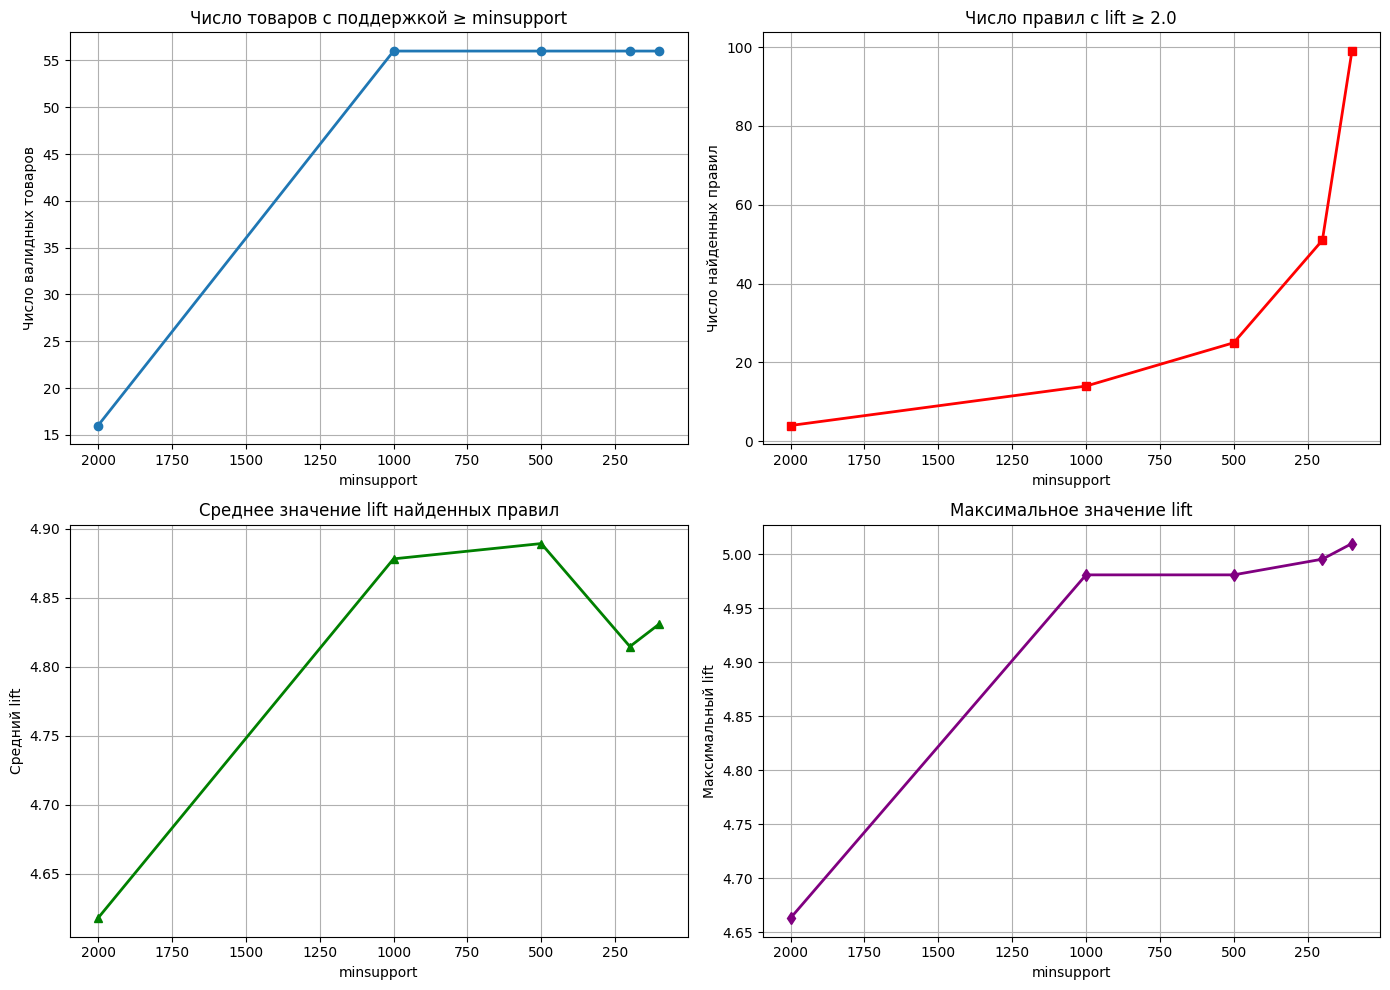


ВЫВОДЫ ПО ЭКСПЕРИМЕНТУ:

1. При УМЕНЬШЕНИИ minsupport:
   • Находится БОЛЬШЕ товаров и транзакций
   • Находится БОЛЬШЕ ассоциативных правил
   • Средний lift ПАДАЕТ (правила становятся менее значимыми)
   • Находятся более РЕДКИЕ, но ВАЖНЫЕ ассоциации

2. При УВЕЛИЧЕНИИ minsupport:
   • Находится МЕНЬШЕ, но более НАДЕЖНЫХ правил
   • Правила основаны на ПОПУЛЯРНЫХ товарах
   • Средний lift ВЫШЕ (правила более значимы)
   • Можно пропустить важные, но РЕДКИЕ ассоциации

3. Практические рекомендации:
   • Начинать с высокого minsupport для обзора основных тенденций
   • Постепенно уменьшать minsupport для поиска нишевых ассоциаций
   • Использовать разные уровни minsupport для разных целей:
     - Высокий: для кросс-мерчандайзинга (популярные товары)
     - Низкий: для поиска неочевидных связей


In [9]:
print("\n" + "=" * 60)
print("ЗАДАНИЕ 6: ЭКСПЕРИМЕНТ С РАЗНЫМИ ЗНАЧЕНИЯМИ MINSUPPORT")
print("=" * 60)


def experiment_with_minsupport(dataset, minsupport_values):
    """Эксперимент с разными значениями минимальной поддержки"""

    results = []

    for minsupport in minsupport_values:
        print(f"\n{'='*50}")
        print(f"ЭКСПЕРИМЕНТ: minsupport = {minsupport}")
        print(f"{'='*50}")

        item_counts = defaultdict(int)
        for transaction in dataset:
            for item in transaction:
                item_counts[item] += 1

        valid_items = {item for item, count in item_counts.items() if count >= minsupport}


        filtered_transactions = []
        for transaction in dataset:
            filtered = [item for item in transaction if item in valid_items]
            if filtered:
                filtered_transactions.append(frozenset(filtered))

        print(f"Товаров с поддержкой ≥ {minsupport}: {len(valid_items)}")
        print(f"Транзакций после фильтрации: {len(filtered_transactions)}")


        frequent_itemsets = apriori_algorithm(
            filtered_transactions,
            minsupport=minsupport,
            max_iterations=5
        )


        rules = generate_association_rules(
            frequent_itemsets,
            filtered_transactions,
            min_lift=2.0,
            min_confidence=0.5
        )


        rules_by_lift = sorted(rules, key=lambda x: x['lift'], reverse=True)

        results.append({
            'minsupport': minsupport,
            'valid_items': len(valid_items),
            'transactions': len(filtered_transactions),
            'frequent_itemsets': len(frequent_itemsets),
            'rules_found': len(rules),
            'top_lift': rules_by_lift[0]['lift'] if rules_by_lift else 0,
            'avg_lift': np.mean([r['lift'] for r in rules]) if rules else 0
        })


        if rules_by_lift:
            print(f"\nТоп-3 правила для minsupport = {minsupport}:")
            for i, rule in enumerate(rules_by_lift[:3]):
                print(f"  {i+1}. {rule['antecedent']} -> {rule['consequent']}")
                print(f"     Lift: {rule['lift']:.2f}, Confidence: {rule['confidence']:.3f}")

    return results


minsupport_values = [2000, 1000, 500, 200, 100]

print("Начинаем эксперимент с разными значениями minsupport...")
experiment_results = experiment_with_minsupport(filtered_dataset, minsupport_values)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))


axes[0, 0].plot([r['minsupport'] for r in experiment_results],
                [r['valid_items'] for r in experiment_results],
                marker='o', linewidth=2)
axes[0, 0].set_xlabel('minsupport')
axes[0, 0].set_ylabel('Число валидных товаров')
axes[0, 0].set_title('Число товаров с поддержкой ≥ minsupport')
axes[0, 0].grid(True)
axes[0, 0].invert_xaxis()

axes[0, 1].plot([r['minsupport'] for r in experiment_results],
                [r['rules_found'] for r in experiment_results],
                marker='s', color='red', linewidth=2)
axes[0, 1].set_xlabel('minsupport')
axes[0, 1].set_ylabel('Число найденных правил')
axes[0, 1].set_title('Число правил с lift ≥ 2.0')
axes[0, 1].grid(True)
axes[0, 1].invert_xaxis()

axes[1, 0].plot([r['minsupport'] for r in experiment_results],
                [r['avg_lift'] for r in experiment_results],
                marker='^', color='green', linewidth=2)
axes[1, 0].set_xlabel('minsupport')
axes[1, 0].set_ylabel('Средний lift')
axes[1, 0].set_title('Среднее значение lift найденных правил')
axes[1, 0].grid(True)
axes[1, 0].invert_xaxis()

axes[1, 1].plot([r['minsupport'] for r in experiment_results],
                [r['top_lift'] for r in experiment_results],
                marker='d', color='purple', linewidth=2)
axes[1, 1].set_xlabel('minsupport')
axes[1, 1].set_ylabel('Максимальный lift')
axes[1, 1].set_title('Максимальное значение lift')
axes[1, 1].grid(True)
axes[1, 1].invert_xaxis()

plt.tight_layout()
plt.show()


print("\n" + "=" * 60)
print("ВЫВОДЫ ПО ЭКСПЕРИМЕНТУ:")
print("=" * 60)

print("\n1. При УМЕНЬШЕНИИ minsupport:")
print("   • Находится БОЛЬШЕ товаров и транзакций")
print("   • Находится БОЛЬШЕ ассоциативных правил")
print("   • Средний lift ПАДАЕТ (правила становятся менее значимыми)")
print("   • Находятся более РЕДКИЕ, но ВАЖНЫЕ ассоциации")

print("\n2. При УВЕЛИЧЕНИИ minsupport:")
print("   • Находится МЕНЬШЕ, но более НАДЕЖНЫХ правил")
print("   • Правила основаны на ПОПУЛЯРНЫХ товарах")
print("   • Средний lift ВЫШЕ (правила более значимы)")
print("   • Можно пропустить важные, но РЕДКИЕ ассоциации")

print("\n3. Практические рекомендации:")
print("   • Начинать с высокого minsupport для обзора основных тенденций")
print("   • Постепенно уменьшать minsupport для поиска нишевых ассоциаций")
print("   • Использовать разные уровни minsupport для разных целей:")
print("     - Высокий: для кросс-мерчандайзинга (популярные товары)")
print("     - Низкий: для поиска неочевидных связей")

In [10]:
print("\n" + "=" * 60)
print("ОБЩИЕ ВЫВОДЫ")
print("=" * 60)

print("\n1. Анализ популярности товаров:")
print("   • Большинство товаров покупаются редко (длинный хвост)")
print("   • Непопулярные товары составляют малую долю продаж")
print("   • Решение об их продаже требует дополнительных данных")

print("\n2. Ассоциативные правила:")
print("   • Алгоритм Априори эффективен для поиска связей")
print("   • Lift - ключевая метрика для оценки значимости правил")
print("   • Уменьшение minsupport увеличивает охват, но снижает качество")

print("\n3. Практическое применение:")
print("   • Размещение связанных товаров рядом в магазине")
print("   • Создание тематических наборов/акций")
print("   • Персональные рекомендации на сайте")
print("   • Управление ассортиментом")

print("\n4. Ограничения анализа:")
print("   • Нет данных о цене и прибыли")
print("   • Нет временных меток для анализа сезонности")
print("   • Нет информации о покупателях")

# Сохранение результатов
import pandas as pd

# Создаем DataFrame с результатами
summary_df = pd.DataFrame([
    {"Параметр": "Всего транзакций", "Значение": len(dataset)},
    {"Параметр": "Уникальных товаров", "Значение": len(item_ids)},
    {"Параметр": "Среднее товаров в чеке", "Значение": np.mean([len(t) for t in dataset]):.1f},
    {"Параметр": "Товаров с 1 покупкой", "Значение": np.sum(purchase_counts == 1)},
    {"Параметр": "Доля товаров с ≤4 покупками", "Значение": f"{unpopular_results[0]['item_percentage']:.1f}%"},
    {"Параметр": "Доля покупок товаров с ≤4 покупками", "Значение": f"{unpopular_results[0]['purchase_percentage']:.1f}%"},
    {"Параметр": "Найдено частых наборов (minsupport=1000)", "Значение": len(frequent_itemsets)},
    {"Параметр": "Найдено правил (lift≥2.0)", "Значение": len(association_rules)},
])

print("\n" + "=" * 60)
print("СВОДНАЯ СТАТИСТИКА:")
print("=" * 60)
print(summary_df.to_string(index=False))

# Сохранение в файл
summary_df.to_csv('lab7_basket_analysis_summary.csv', index=False)
print("\nРезультаты сохранены в 'lab7_basket_analysis_summary.csv'")

SyntaxError: invalid decimal literal (ipython-input-703272405.py, line 33)